# K - means Clustering

It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.

It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.
The algorithm takes the unlabeled dataset as input, divides the dataset into k-number of clusters, and repeats the process until it does not find the best clusters. The value of k should be predetermined in this algorithm.

- Import necessary libraries
- Import dataset
- Data Preprocessing
- Select the features to cluster
- Find optimal number of clusters (elbow method)
- Train the model on the dataset using the optimal cluster K value
- Visualize the clusters

## Import the necessary libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import dataset

In [16]:
dataset = pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [18]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Data visualization

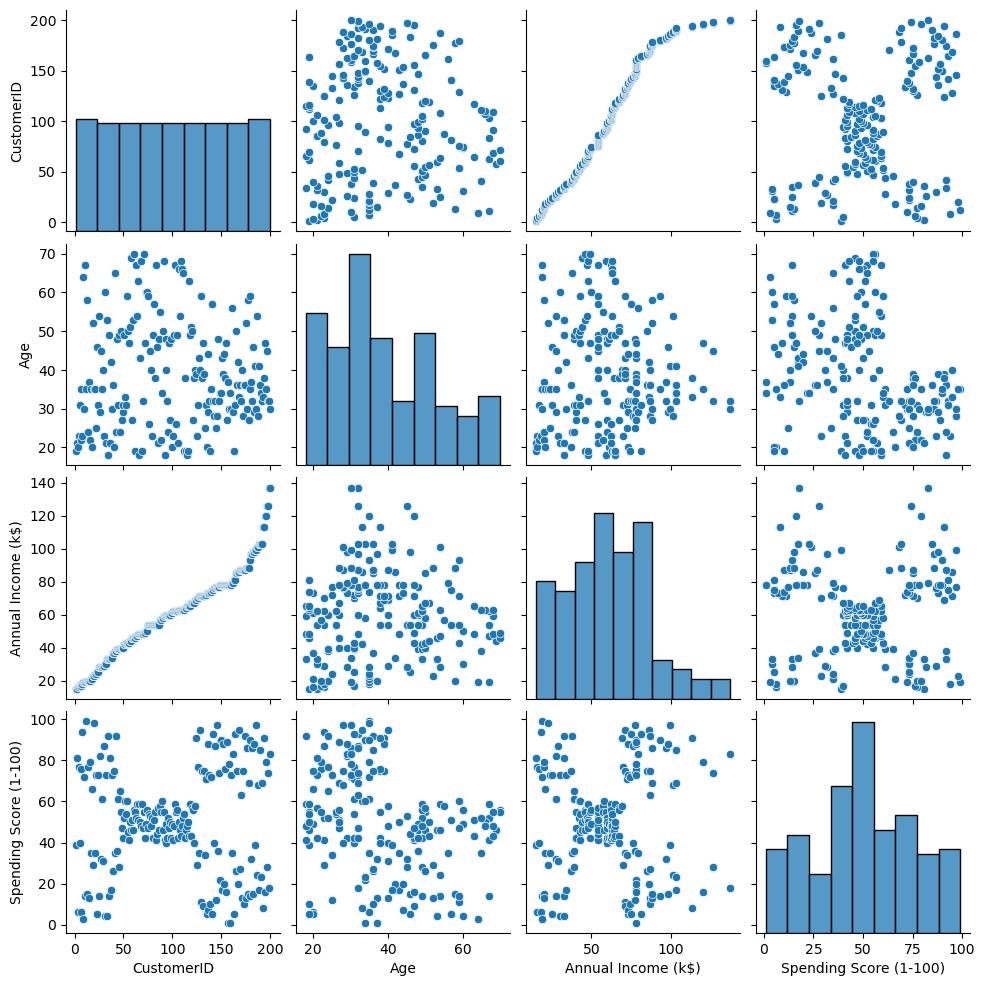

In [19]:
sns.pairplot(dataset)

## Handling Null values

In [20]:
dataset.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no null values in this dataset.

## Outlier detection

<Axes: >

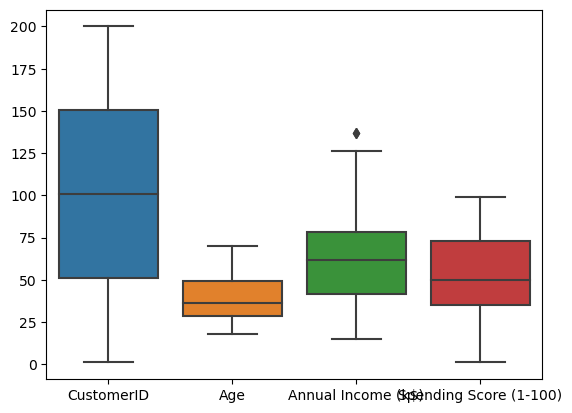

In [21]:
sns.boxplot(dataset)

There are no major outliers in this dataset.

## Select the features to cluster

In [22]:
X = dataset.iloc[:, 3:].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

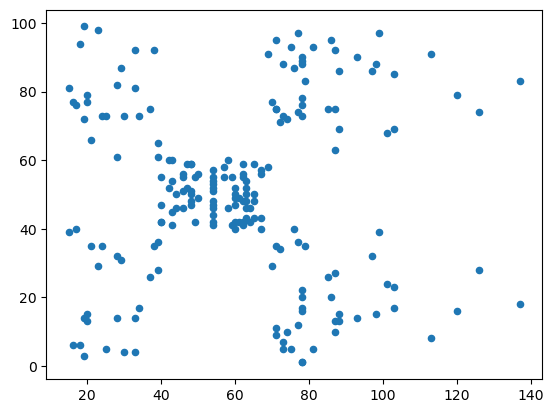

In [53]:
plt.scatter(X[:, 0], X[:, 1], s = 20)
plt.show()

## Finding the optimal number of clusters (elbow method)

The elbow method is a graphical representation of finding the optimal ‘K’ in a K-means clustering. It works by finding `WCSS (Within-Cluster Sum of Square)` i.e. the sum of the square distance between points in a cluster and the cluster centroid.

In [24]:
from sklearn.cluster import KMeans
WCSS = []
for k in range (1, 11):
    kmeans = KMeans(n_clusters = k, init = "k-means++", random_state = 0)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

In [25]:
WCSS

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484347,
 30259.65720728547,
 25050.832307547527,
 21862.092672182887,
 19657.783608703954]

### Plotting the elbow curve

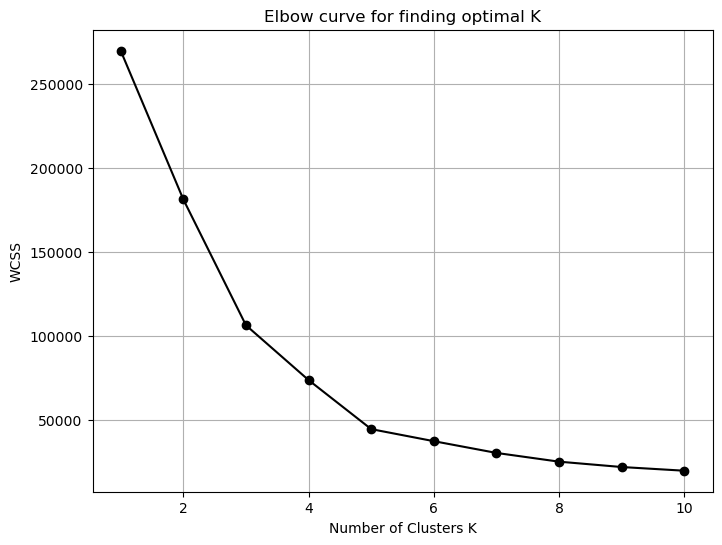

In [28]:
plt.figure(figsize = (8, 6))
plt.plot(range(1, 11), WCSS, marker = "o", color = "black")
plt.title("Elbow curve for finding optimal K")
plt.xlabel("Number of Clusters K")
plt.ylabel("WCSS")
plt.grid()
plt.show()

We select the value of K to be 5 as we see an elbow at K = 5.

## Training the model on the dataset using the optimal number of K value

In [29]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 0)
Y_kmeans = kmeans.fit_predict(X) #returns a label for data based on their cluster
Y_kmeans

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

Here, 0 - 4 are the label of clusters in the dataset. The values returned by _Y_kmeans_ is are the labels of clusters in which the coordinates in _X_ belong to.

In [30]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

i.e., (15, 39) lies in cluster 3.

## Visualizing the clusters

In [31]:
X[Y_kmeans == 0, 0]# The datapoints which belong to the 0th cluster from the 0th column

array([39, 40, 40, 40, 40, 42, 42, 43, 43, 43, 43, 44, 44, 46, 46, 46, 46,
       47, 47, 48, 48, 48, 48, 48, 48, 49, 49, 50, 50, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 57, 57, 58, 58, 59, 59, 60, 60, 60, 60,
       60, 60, 61, 61, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 64,
       64, 65, 65, 65, 65, 67, 67, 67, 67, 69, 71, 72, 76], dtype=int64)

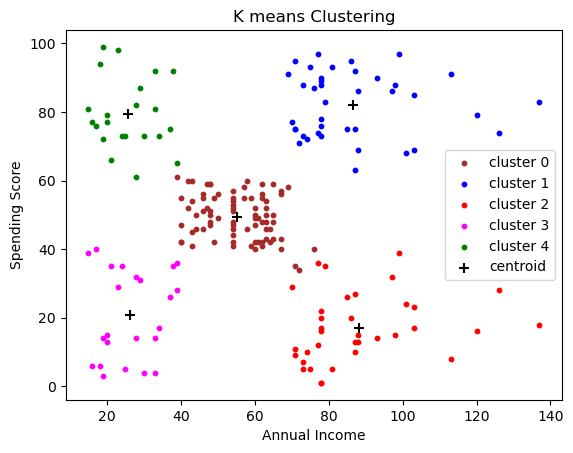

In [52]:
plt.scatter(X[Y_kmeans == 0, 0], X[Y_kmeans == 0, 1], color = "brown", s = 10, label = "cluster 0")
plt.scatter(X[Y_kmeans == 1, 0], X[Y_kmeans == 1, 1], color = "blue", s = 10, label = "cluster 1")
plt.scatter(X[Y_kmeans == 2, 0], X[Y_kmeans == 2, 1], color = "red", s = 10, label = "cluster 2")
plt.scatter(X[Y_kmeans == 3, 0], X[Y_kmeans == 3, 1], color = "magenta", s = 10, label = "cluster 3")
plt.scatter(X[Y_kmeans == 4, 0], X[Y_kmeans == 4, 1], color = "green", s = 10, label = "cluster 4")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = "black", s = 50, label = "centroid", marker = "+") #0tha nd 1st column
plt.title("K means Clustering")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()